In [13]:
import matplotlib.pyplot as plt
import numpy as np
import math
import time

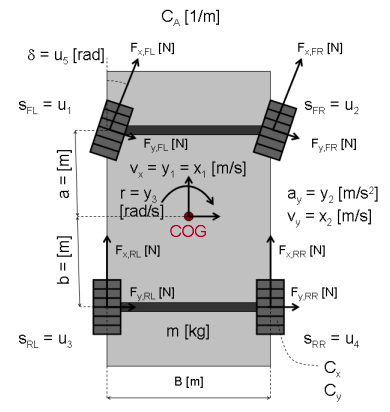

In [17]:
class model:
    
    global m,a,b,maxP,Cx,Cy,CA,g,mu
    g=9.81 
    mu=0.75 #should be dynamic in the future
    
    
    def __init__(self,x,p,step):
        global m,a,b,maxP,Cx,Cy,CA,g,mu
        # Retrieve model parameters.
        m  = p[0];   # Vehicle mass.                    
        a  = p[1];   # Distance from front axle to COG. 
        b  = p[2];   # Distance from rear axle to COG.
        maxP = p[3]  # Maximum Power Excalleration
        Cx = p[4];   # Longitudinal tire stiffness.     
        Cy = p[5];   # Lateral tire stiffness.      
        CA = p[6];   # Air resistance coefficient.     
        
        #x[0]: Longitudinal vehicle velocity. 
        #x[1]: Lateral vehicle velocity. 
        #x[2]: Yaw rate.
        #x[3]: Angle
        #x[4]: X-Position
        #x[5]: Y-Position
        
        self.x[0]=x[0]
        self.x[1]=x[1]
        self.x[2]=x[2]
        self.x[3]=x[3]
        self.x[4]=0
        self.x[5]=0
        
        
    def getdotstates(self,u):    
        self.dx[0] = (x[1]*x[2]+1/m[0]*(Cx[0]*(u[0]+u[1])*math.cos(u[4])
              -2*Cy[0]*(u[4]-(x[1]+a[0]*x[2])/x[0])*math.sin(u[4])
              +Cx[0]*(u[2]+u[3])-CA[0]*pow(x[0],2)))
        self.dx[1] = (-x[0]*x[2]+1/m[0]*(Cx[0]*(u[0]+u[1])*math.sin(u[4])
              +2*Cy[0]*(u[4]-(x[1]+a[0]*x[2])/x[0])*math.cos(u[4])
              +2*Cy[0]*(b[0]*x[2]-x[1])/x[0]))
        self.dx[2] = (1/(math.pow(((a[0]+b[0])/2),2)*m[0])
              *(a[0]*(Cx[0]*(u[0]+u[1])*sin(u[4])
              +2*Cy[0]*(u[4]-(x[1]+a[0]*x[2])/x[0])*math.cos(u[4]))
              -2*b[0]*Cy[0]*(b[0]*x[2]-x[1])/x[0]))

        self.dx[3] = self.x[3]
        
        
        
        #Changing Variable
        self.gamma=0
        self.Fres=0
        
        #Global States (States to another Coordination System)
        #gX[0]: X-Coordinate
        #gX[1]: Y-Coordinate
        #gX[2]: Angle  0° is left, 90° is up usw.
        
        gX[0]=0
        gX[1]=0
        gX[2]=0 # Needs to change to be tangent to curve
        
        
        
        #Final parameters
        self.M=M
        self.maxP=maxP
        self.step
        
        #Initalising States and Dot_States
        self.dot_states=np.zeros(3)
        
        
        
   #Gets and Sets     
    def get_states(self):
        return self.states
    def get_dot_states(self):
        return self.dot_states
    def set_states(self,x,y,v):
        self.states[0]=x
        self.states[1]=y
        self.states[2]=v
    
    def eval_dot(self):
        self.dot_states[0]=self.states[2]*math.cos(self.gamma)
        self.dot_states[1]=self.states[2]*math.sin(self.gamma)
        self.dot_states[2]=self.Fres/self.M
        
    def update_model(self,Fres,gamma):
        self.gamma=gamma;
        self.Fres=Fres;
        self.eval_dot()
        self.states=self.states+self.dot_states*1
    
    
    def updateGlobalStates(self,xdot_states,gX):
        
        #Calculate Time for discret timestep
        t=getTime()
        
        
        
        gX[0]=self.step
        gX[1]=self.step*math.cos()
        
    
    def Force_constraints(self,x):
        global mu,g
        #x[0]=v
        #x[1]=gamma
            
        '''
        Zum Zeitpunkt xk (v,und lenkrichtung)
         
        '''
            
        Fres=self.M*g*mu  #Reibwertänderung / Downforce
        Fres_x=self.maxP/x[0]

        Fres_y
        
        
        
        return Fres_x*math.cos(self.gamma)
    
    
    def __repr__(self):
        a="--------Model--------"
        b="".join(["States: \n", "  X-Position:\t",str(self.states[0]),"\n  Y-Postion:\t",str(self.states[1]),"\n  Velocity:\t",str(self.states[2])])
        c="".join(["Dot_States: \n","  X_Dot:\t",str(self.dot_states[0]),"\n  Y_Dot:\t",str(self.dot_states[1]),"\n  Acceleration:\t",str(self.dot_states[2]),"\n"])
        return "\n".join([a,b,c])